**Import necessary libraries and load the dataset:**

*  **numpy**: A fundamental package for scientific computing with Python. It provides support for arrays, matrices, and a large library of high-level mathematical functions to operate on these arrays. Though not directly used in the snippet provided, numpy is often a dependency for data manipulation and computational tasks.
*   **pandas**: An essential library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series, making it perfect for data preprocessing tasks like loading, modifying, and saving datasets.
*   **sklearn.model_selection:** Part of the scikit-learn library, it provides functions for splitting datasets into training and testing sets, cross-validation, and other model selection and evaluation tools. The train_test_split function is specifically imported but not used in the snippet.
*   **sklearn.linear_model:** This submodule of scikit-learn is used for linear models. It includes the LinearRegression class, which is intended for use in predictive modeling and analysis but is not utilized in the provided code.
*   **matplotlib.pyplot**: A plotting library that offers a MATLAB-like interface, making it easy to generate plots, histograms, bar charts, and other types of visualizations. It is used for generating plots but not directly applied in the snippet.

**Load the Dataset:**
  The code loads a dataset from a CSV file using pandas.read_csv. This dataset, presumably containing information on avocado sales, is stored in the DataFrame df.

**Drop One-hot Encoded Region Columns:**
  It identifies and drops the one-hot encoded region columns from the DataFrame. One-hot encoding is a process of converting categorical data into a format that could be provided to ML algorithms to do a better job in prediction. The columns are identified by checking for 'region_' in their names, indicating they were created during one-hot encoding to represent different regions. This step is crucial for preparing the dataset for linear regression, focusing analysis on more direct predictors and reducing dimensionality.

**Save the Modified Dataset:**
  The modified DataFrame, which no longer contains the one-hot encoded region columns, is saved back to a CSV file. This allows the cleaned and preprocessed dataset to be easily accessed for further analysis, modeling, or sharing. The to_csv method of pandas.DataFrame is used here without indexing to ensure the CSV file is clean and ready for use.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
df = pd.read_csv('/content/avocado_train_preprocessed (2).csv')
# Drop the one-hot encoded region columns
columns_to_drop = [col for col in df.columns if 'region_' in col]
df_dropped = df.drop(columns=columns_to_drop)

# Save the modified dataset to the Colab environment
df_dropped.to_csv('/content/avocado_train_preprocessed_no_regions.csv', index=False)



*   This code performs a linear regression analysis to model and predict prices using a dataset that presumably includes various features related to avocado sales. The process involves training a model on a portion of the data and then evaluating its performance on a separate test dataset.
*   **Import Metrics from scikit-learn:**
  Imports mean_squared_error and r2_score functions from sklearn.metrics. These are used to evaluate the performance of the linear regression model.
*   **Prepare Features and Target Variable:**
  Separates the dataset into features (X) and the target variable (y). The features include all columns except AveragePrice, which is used as the target variable for prediction.
*   **Split the Dataset:**
  Uses train_test_split from sklearn.model_selection to divide the data into training and testing sets. 80% of the data is used for training the model (X_train, y_train), and 20% is held back for testing (X_test, y_test). The random_state=42 parameter ensures that the split is reproducible.


*   **Initialize and Train the Linear Regression Model:**
  Initializes a LinearRegression model from sklearn.linear_model and fits it to the training data. This step involves finding the coefficients for the linear equation that best fits the data, minimizing the difference between predicted and actual values of the target variable.
*   **Make Predictions on the Test Set:**
Uses the trained model to make predictions on the test set (X_test). These predictions (y_pred) represent the model's estimation of avocado prices based on the features in the test dataset.
*   **Evaluate the Model:**
  Calculates the Mean Squared Error (MSE) and R-squared (R²) score of the model based on its predictions and the actual prices in the test set (y_test). MSE measures the average squared difference between actual and predicted values, providing a sense of the model's prediction error. A lower MSE indicates a better fit. The R² score measures how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. An R² score closer to 1 indicates a better fit.
*   **Visualize the Results:**
Uses matplotlib to create a scatter plot comparing the actual (y_test) and predicted (y_pred) avocado prices. This visualization helps in assessing how well the model's predictions align with the actual prices, with a closer alignment along a diagonal line indicating a better fit.


Mean Squared Error: 0.0078587909246812
R^2 Score: 0.6067757549578401


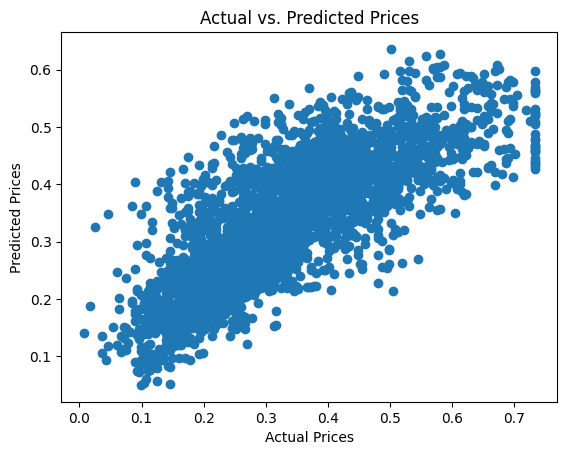

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Assuming 'AveragePrice' is the target variable and all others are features
X = df.drop('AveragePrice', axis=1)  # Features
y = df['AveragePrice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# visualize the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

**Inference:**
  The scatter plot shows a moderate positive relationship between actual and predicted avocado prices, with an R-squared value of 0.607 indicating the model explains approximately 60.7% of the variance in price. The Mean Squared Error of around 0.00786 suggests predictions are fairly close to the actual values. However, the spread of points suggests some inaccuracies in prediction, especially at higher price levels, indicating potential areas for model improvement.

**Statsmodels:**
  The code fits an Ordinary Least Squares (OLS) regression model using the statsmodels library on the training data and then prints a summary of the model. The summary provides detailed statistics about the model's coefficients, their standard errors, t-values, p-values, and several goodness-of-fit measures like R-squared, which indicates how well the model explains the variability of the response data. It's a comprehensive overview of the model's performance and the statistical significance of each predictor.

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/avocado_train_preprocessed_no_regions.csv')  # Adjust this path to your dataset

# Define features (X) and target (y)
X = df.drop('AveragePrice', axis=1)  # Assuming 'AveragePrice' is the target variable
y = df['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept) for the training set
X_train_const = sm.add_constant(X_train)

# Fit the OLS model on the training set
model = sm.OLS(y_train, X_train_const).fit()

# Display the summary of the model based on the training set
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     926.6
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:59:00   Log-Likelihood:                 10252.
No. Observations:               11679   AIC:                        -2.048e+04
Df Residuals:                   11666   BIC:                        -2.038e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -41.3800      2.203    -18.787   

**R-squared of 0.488:** The model explains 48.8% of the variance in the average price.

**Adjusted R-squared of 0.487**: Indicates that the number of predictors is appropriate.

**F-statistic significance:** With a Prob (F-statistic) near zero, the model is statistically significant.

**Coefficients**: Variables like type positively affect the average price, while Total Volume has a negative effect. All predictors are statistically significant with p-values < 0.05.

**Durbin-Watson of 2.006**: Suggests no autocorrelation in the residuals.

**Omnibus and Jarque-Bera tests:** Indicate the residuals may not be normally distributed.

**Large condition number**: Points to potential multicollinearity issues among features.


**Correlation Matrix:**
  Measures linear relationships between variables.
Coefficients range from -1 (strong negative) to 1 (strong positive).
Aids in feature selection and identifying multicollinearity.
*   **Data Combination:** Merges feature and target data into one DataFrame for correlation analysis.
*   **Correlation Matrix Calculation:** Computes how variables in the dataset relate to each other numerically.
*   **Correlation Matrix Output:** Prints the matrix showing all pairwise correlation coefficients.
*   **Target Correlation Output:** Prints sorted correlations between all features and AveragePrice.





In [ ]:
# Combine the training features and the target variable into a single DataFrame
# This is necessary because the correlation matrix requires a single DataFrame as input
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix for the training dataset
corr_matrix_train = train_df.corr()

# Print the full correlation matrix
print("Full Correlation Matrix:")
print(corr_matrix_train)

# Print the correlation of all independent variables with the dependent variable 'AveragePrice'
print("\nCorrelation with AveragePrice:")
print(corr_matrix_train['AveragePrice'].sort_values(ascending=False))

Full Correlation Matrix:
              Total Volume      4046      4225      4770  Total Bags  \
Total Volume      1.000000  0.864776  0.917234  0.733424    0.927047   
4046              0.864776  1.000000  0.680887  0.645065    0.793281   
4225              0.917234  0.680887  1.000000  0.716348    0.810536   
4770              0.733424  0.645065  0.716348  1.000000    0.660971   
Total Bags        0.927047  0.793281  0.810536  0.660971    1.000000   
Small Bags        0.913525  0.762135  0.828845  0.673833    0.963192   
Large Bags        0.706275  0.676520  0.563252  0.438878    0.771030   
XLarge Bags       0.580529  0.530444  0.551695  0.558030    0.599572   
type             -0.657756 -0.626490 -0.628026 -0.611261   -0.626612   
Day              -0.011737 -0.010259 -0.012089 -0.006624   -0.000265   
Month            -0.026000 -0.018957 -0.018901 -0.028659   -0.017036   
Year              0.031541  0.010448 -0.015764 -0.096368    0.142096   
AveragePrice     -0.512542 -0.531229 -0

Analyzes correlations between independent variables and a dependent variable in a DataFrame.

*   Parameters:
    - dataframe: A pandas DataFrame with both independent and dependent variables.
    - dependent_var: The name of the dependent variable (as a string).
    - corr_threshold: The absolute value of correlation above which a correlation is considered significant.
*   Returns:
    - pos_correlated: A list of variables that are positively correlated with the dependent variable above the threshold.
    - neg_correlated: A list of variables that are negatively correlated with the dependent variable above the threshold.
    - justification: A string explaining the choice of threshold.

In [ ]:
import pandas as pd

def analyze_correlations(dataframe, dependent_var, corr_threshold=0.3):

    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Isolate the correlations with the dependent variable
    dep_var_corr = corr_matrix[dependent_var].drop(dependent_var)

    # Identify positively and negatively correlated variables based on the threshold
    pos_correlated = dep_var_corr[dep_var_corr > corr_threshold].index.tolist()
    neg_correlated = dep_var_corr[dep_var_corr < -corr_threshold].index.tolist()

    # Justification for the choice of threshold
    justification = f"A correlation threshold of {corr_threshold} was chosen to identify strong relationships. "\
                    "This threshold is commonly used in statistical analysis to distinguish between moderate "\
                    "and strong correlations, providing a balance between sensitivity and specificity."

    return pos_correlated, neg_correlated, justification

# Example usage with a hypothetical DataFrame 'df' and 'AveragePrice' as the dependent variable
# Adjust 'df' and 'AveragePrice' according to your specific dataset and target variable
pos_correlated, neg_correlated, justification = analyze_correlations(df, 'AveragePrice', 0.3)

print("Positively Correlated Variables:", pos_correlated)
print("Negatively Correlated Variables:", neg_correlated)
print("Justification for Threshold Choice:", justification)


Positively Correlated Variables: ['type']
Negatively Correlated Variables: ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
Justification for Threshold Choice: A correlation threshold of 0.3 was chosen to identify strong relationships. This threshold is commonly used in statistical analysis to distinguish between moderate and strong correlations, providing a balance between sensitivity and specificity.


This code snippet refines a DataFrame by selecting variables based on their correlation with a target variable ('AveragePrice'):

*   **Create List of Variables to Keep**: It specifies a list of variables deemed important based on their correlation strength.
*   **Include Dependent Variable:** It appends 'AveragePrice' to ensure the target variable is included in the new DataFrame.
*   **Create New DataFrame with Selected Variables:** It generates df_selected, which contains only the variables of interest.
*   **Set Correlation Threshold**: It establishes a threshold (0.3) to identify weak correlations.
*   **Identify and Drop Weakly Correlated Variables:** It finds variables weakly correlated with 'AveragePrice' and creates df_reduced, which excludes these variables.
*   Ultimately, the code provides two DataFrames (df_selected and df_reduced) with a more focused set of features likely to be more predictive of the target variable, based on the strength of their correlations.

In [ ]:
# Assuming 'df' is your DataFrame and 'corr_matrix' is your correlation matrix

# List of variables you identified as not contributing much (weak correlation)
# This list should be customized based on your specific correlation analysis results and domain knowledge
# For this example, let's assume variables with |correlation| < 0.3 are considered weak and not listed here
# since you already identified 'type' as positively correlated and others as negatively correlated
# If 'type' was the only variable significantly correlated, you'd drop others, but let's assume you want to keep some
variables_to_keep = ['type', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Ensure that your dependent variable 'AveragePrice' is also included in the new DataFrame
variables_to_keep.append('AveragePrice')

# Create a new DataFrame with selected variables
df_selected = df[variables_to_keep]

# Alternatively, if you want to drop these variables automatically based on the correlation threshold
corr_threshold = 0.3
dependent_var = 'AveragePrice'

# Identify weakly correlated variables (excluding the dependent variable itself)
weak_correlations = df.corr()[dependent_var].apply(lambda x: abs(x) < corr_threshold).drop(dependent_var)

# List of weakly correlated variables to drop
variables_to_drop = weak_correlations[weak_correlations].index.tolist()

# Drop these variables
df_reduced = df.drop(columns=variables_to_drop)

# You now have 'df_selected' or 'df_reduced' with more relevant features for prediction


**Again performing Statsmodels**

In [ ]:

# Include only significantly correlated variables and the dependent variable
significant_vars = ['type', 'XLarge Bags', '4225', 'Large Bags', 'Small Bags', '4770', 'Total Bags', 'Total Volume', '4046', 'AveragePrice']
df_updated = df[significant_vars]

# Prepare features (X) and target (y)
X_updated = df_updated.drop('AveragePrice', axis=1)
y_updated = df_updated['AveragePrice']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

# Add a constant to the model for the intercept
import statsmodels.api as sm
X_train_const_updated = sm.add_constant(X_train_updated)

# Fit the OLS model
model_updated = sm.OLS(y_train_updated, X_train_const_updated).fit()

# Print the summary of the updated model
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1059.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:27:10   Log-Likelihood:                 9830.0
No. Observations:               11679   AIC:                        -1.964e+04
Df Residuals:                   11669   BIC:                        -1.957e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2886      0.003    109.963   

**Printing R squared and Root Mean Squared Error:**

In [ ]:
# Assuming you have already fitted the model_updated as shown in the previous step
print("R-squared for the model:", model_updated.rsquared)

# To calculate the RMSE for the test set:
# First, add a constant to the test features since the model includes an intercept
X_test_const_updated = sm.add_constant(X_test_updated)

# Make predictions on the test set
y_pred_updated = model_updated.predict(X_test_const_updated)

# Calculate the Mean Squared Error and Root Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_updated = mean_squared_error(y_test_updated, y_pred_updated)
rmse_updated = mse_updated**0.5

print("Root Mean Squared Error (RMSE) on Test Set:", rmse_updated)


R-squared for the model: 0.4496782025621351
Root Mean Squared Error (RMSE) on Test Set: 0.10336005345041263


**Plotting scatter plot between each independent variable and dependent variable(Average price):**

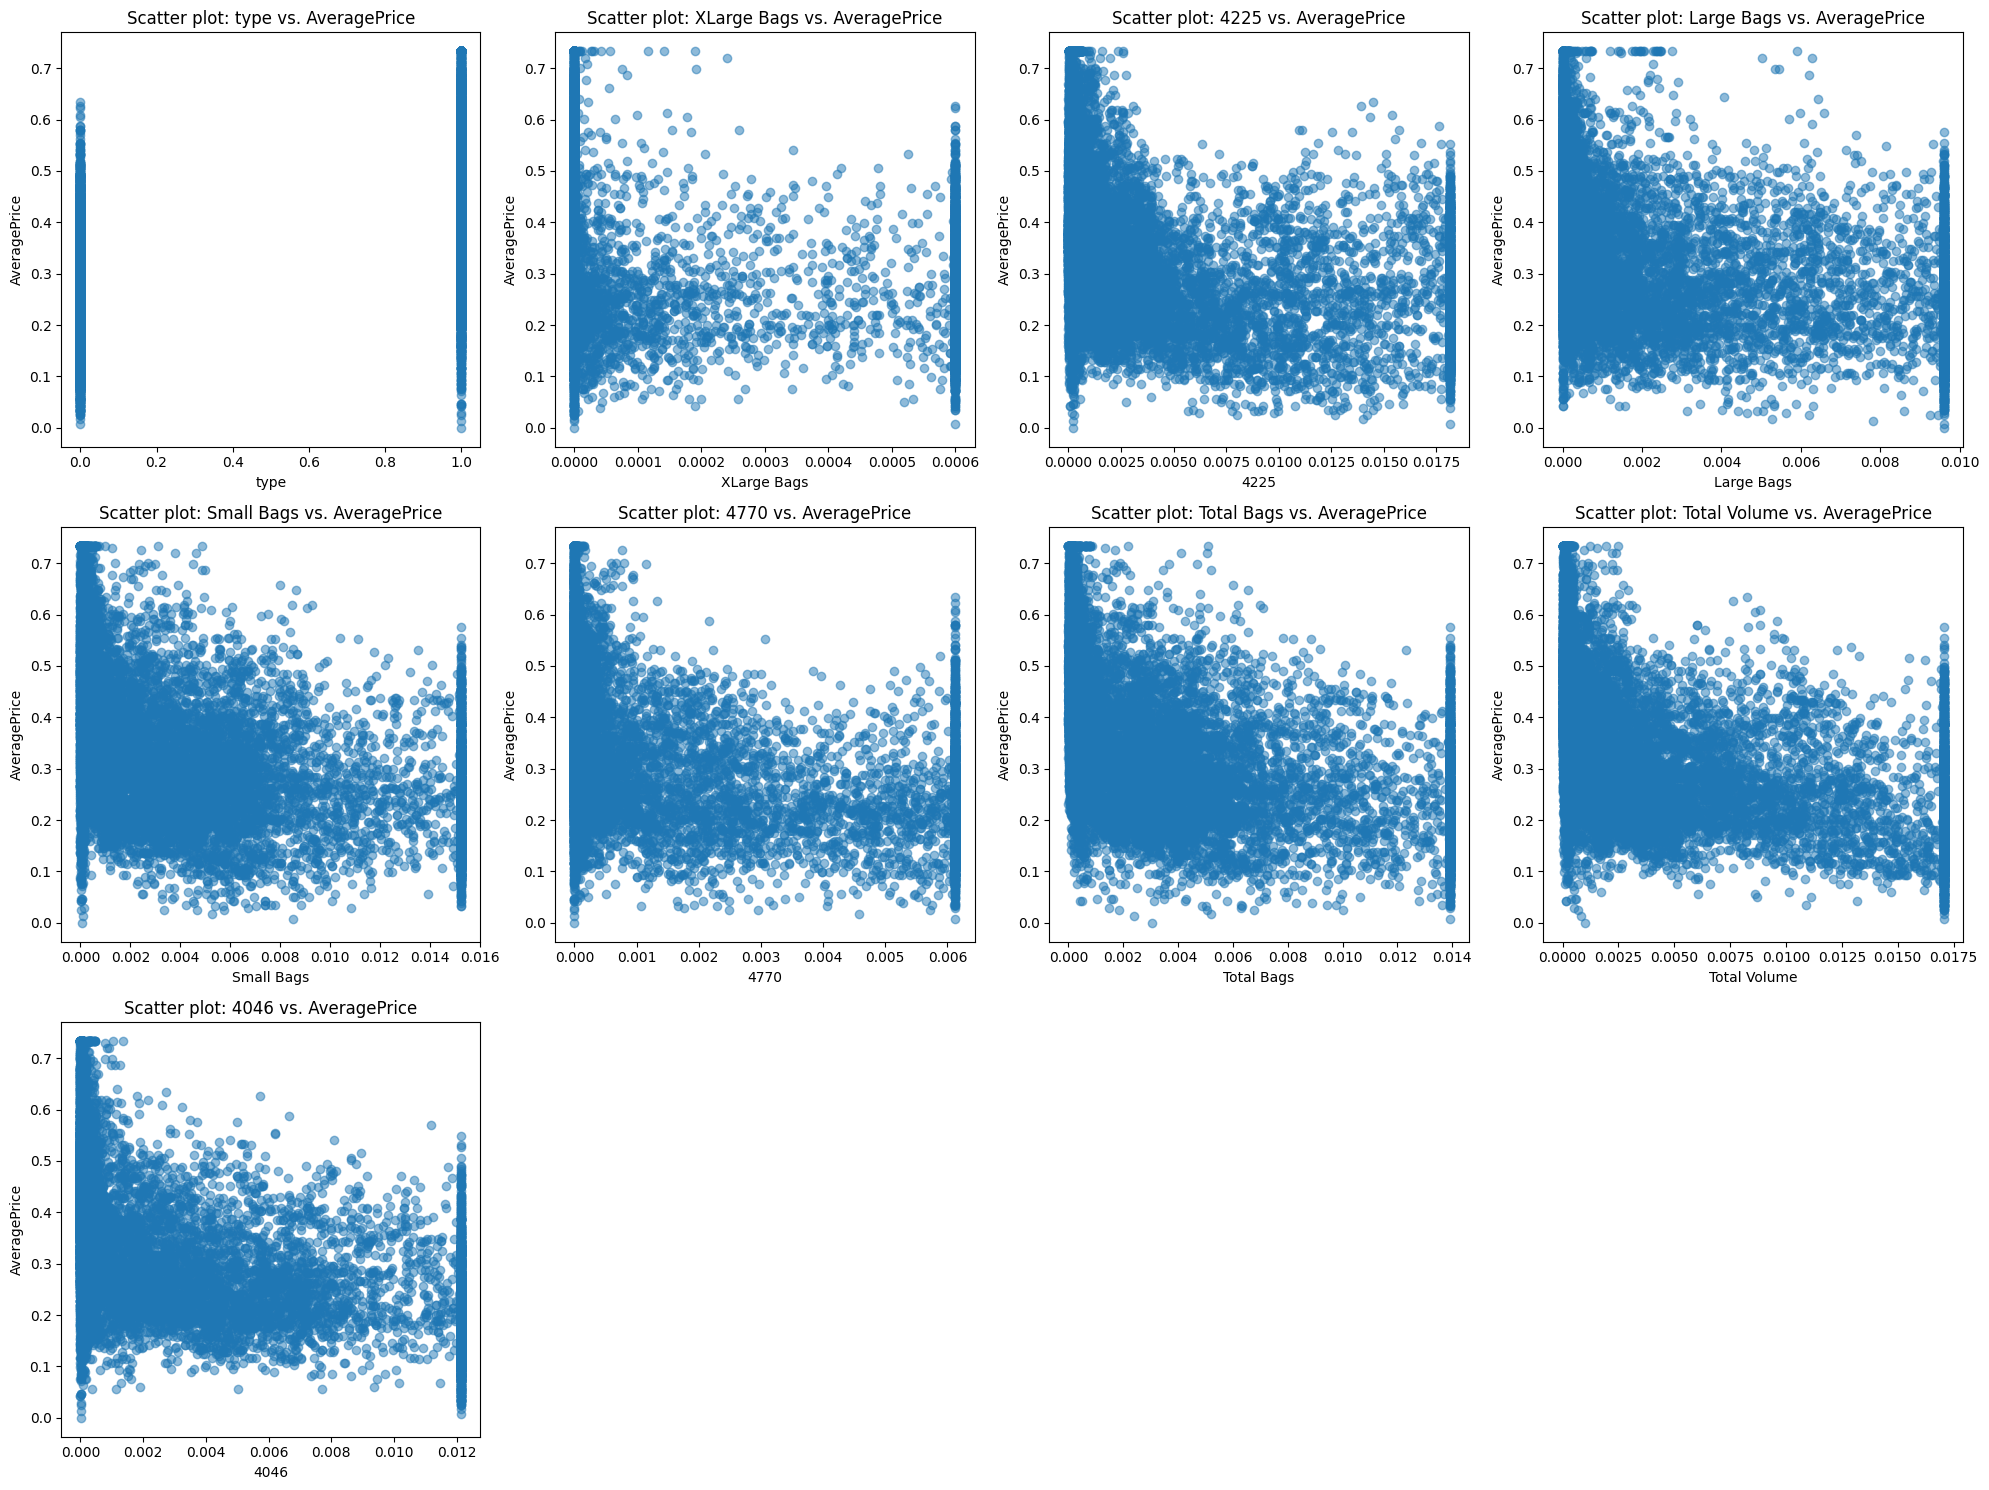

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_updated' contains only the significant variables including 'AveragePrice'
# and 'significant_vars' is the list of all these variables

# List of independent variables (excluding 'AveragePrice')
independent_vars = [var for var in significant_vars if var != 'AveragePrice']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each independent variable to create a scatter plot
for i, var in enumerate(independent_vars, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size (3 rows, 4 columns) based on your number of variables
    plt.scatter(df_updated[var], df_updated['AveragePrice'], alpha=0.5)
    plt.title(f'Scatter plot: {var} vs. AveragePrice')
    plt.xlabel(var)
    plt.ylabel('AveragePrice')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()
